In [ ]:
# Copyright © 2025 UChicago Argonne, LLC All right reserved
# Full license accessible at https://github.com/AdvancedPhotonSource/DONUT/blob/main/LICENSE

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import cmcrameri.cm as cmc

%matplotlib inline
plt.style.use('/home/beams/B313762/stylesheet.mplstyle')

In [2]:
df_loss_weights = pd.read_csv('loss_weights.csv')
df_loss_weights.head()

,Step,hearty-armadillo-352 - sim. loss,hearty-armadillo-352 - sim. loss__MIN,hearty-armadillo-352 - sim. loss__MAX,stilted-sun-351 - sim. loss,stilted-sun-351 - sim. loss__MIN,stilted-sun-351 - sim. loss__MAX,wise-music-350 - sim. loss,wise-music-350 - sim. loss__MIN,wise-music-350 - sim. loss__MAX,ethereal-pond-349 - sim. loss,ethereal-pond-349 - sim. loss__MIN,ethereal-pond-349 - sim. loss__MAX,northern-elevator-345 - sim. loss,northern-elevator-345 - sim. loss__MIN,northern-elevator-345 - sim. loss__MAX
0,2,1.366430,1.366430,1.366430,1.357301,1.357301,1.357301,1.492369,1.492369,1.492369,1.365642,1.365642,1.365642,1.360613,1.360613,1.360613
1,6,1.362889,1.362889,1.362889,1.342283,1.342283,1.342283,1.490603,1.490603,1.490603,1.349784,1.349784,1.349784,1.350023,1.350023,1.350023
2,10,1.367691,1.367691,1.367691,1.335370,1.335370,1.335370,1.490140,1.490140,1.490140,1.347838,1.347838,1.347838,1.348167,1.348167,1.348167
3,14,1.359214,1.359214,1.359214,0.658560,0.658560,0.658560,1.489958,1.489958,1.489958,1.346805,1.346805,1.346805,1.347233,1.347233,1.347233
4,18,1.346011,1.346011,1.346011,0.568815,0.568815,0.568815,1.489866,1.489866,1.489866,1.345687,1.345687,1.345687,1.346202,1.346202,1.346202


In [3]:
# All these models are trained on a combination of noisy simulated and experimental data
dec1sim5 = df_loss_weights['northern-elevator-345 - sim. loss'].to_numpy()
dec1sim5 = dec1sim5[~np.isnan(dec1sim5)]
print('Decoder: 1, Forward: 5 | # Epochs: ', dec1sim5.shape[0])
dec1sim3 = df_loss_weights['ethereal-pond-349 - sim. loss'].to_numpy()
dec1sim3 = dec1sim3[~np.isnan(dec1sim3)]
print('Decoder: 1, Forward: 3 | # Epochs: ', dec1sim3.shape[0])
dec1sim1 = df_loss_weights['wise-music-350 - sim. loss'].to_numpy()
dec1sim1 = dec1sim1[~np.isnan(dec1sim1)]
print('Decoder: 1, Forward: 1 | # Epochs: ', dec1sim1.shape[0])
dec1sim9 = df_loss_weights['stilted-sun-351 - sim. loss'].to_numpy()
dec1sim9 = dec1sim9[~np.isnan(dec1sim9)]
print('Decoder: 1, Forward: 9 | # Epochs: ', dec1sim9.shape[0])
dec0sim1 = df_loss_weights['hearty-armadillo-352 - sim. loss'].to_numpy()
dec0sim1 = dec0sim1[~np.isnan(dec0sim1)]
print('Decoder: 0, Forward: 1 | # Epochs: ', dec0sim1.shape[0])

Decoder: 1, Forward: 5 | # Epochs:  28
Decoder: 1, Forward: 3 | # Epochs:  30
Decoder: 1, Forward: 1 | # Epochs:  30
Decoder: 1, Forward: 9 | # Epochs:  30
Decoder: 0, Forward: 1 | # Epochs:  30


In [4]:
df_l1l2 = pd.read_csv('l1l2.csv')
df_l1l2.head()

,Step,leafy-salad-353 - sim. loss,leafy-salad-353 - sim. loss__MIN,leafy-salad-353 - sim. loss__MAX,northern-elevator-345 - sim. loss,northern-elevator-345 - sim. loss__MIN,northern-elevator-345 - sim. loss__MAX
0,2,3.196402,3.196402,3.196402,1.360613,1.360613,1.360613
1,6,2.559289,2.559289,2.559289,1.350023,1.350023,1.350023
2,10,2.459886,2.459886,2.459886,1.348167,1.348167,1.348167
3,14,2.423427,2.423427,2.423427,1.347233,1.347233,1.347233
4,18,2.370518,2.370518,2.370518,1.346202,1.346202,1.346202


In [6]:
# Trained on combo of noisy simulated and experimental data
smoothl1 = df_l1l2['northern-elevator-345 - sim. loss'].to_numpy()
smoothl1 = smoothl1[~np.isnan(smoothl1)]
print('SmoothL1 Loss Epochs: ', smoothl1.shape[0])
l2 = df_l1l2['leafy-salad-353 - sim. loss'].to_numpy()
l2 = l2[~np.isnan(l2)]
print('MSE Loss Epochs: ', l2.shape[0])

SmoothL1 Loss Epochs:  28
MSE Loss Epochs:  30


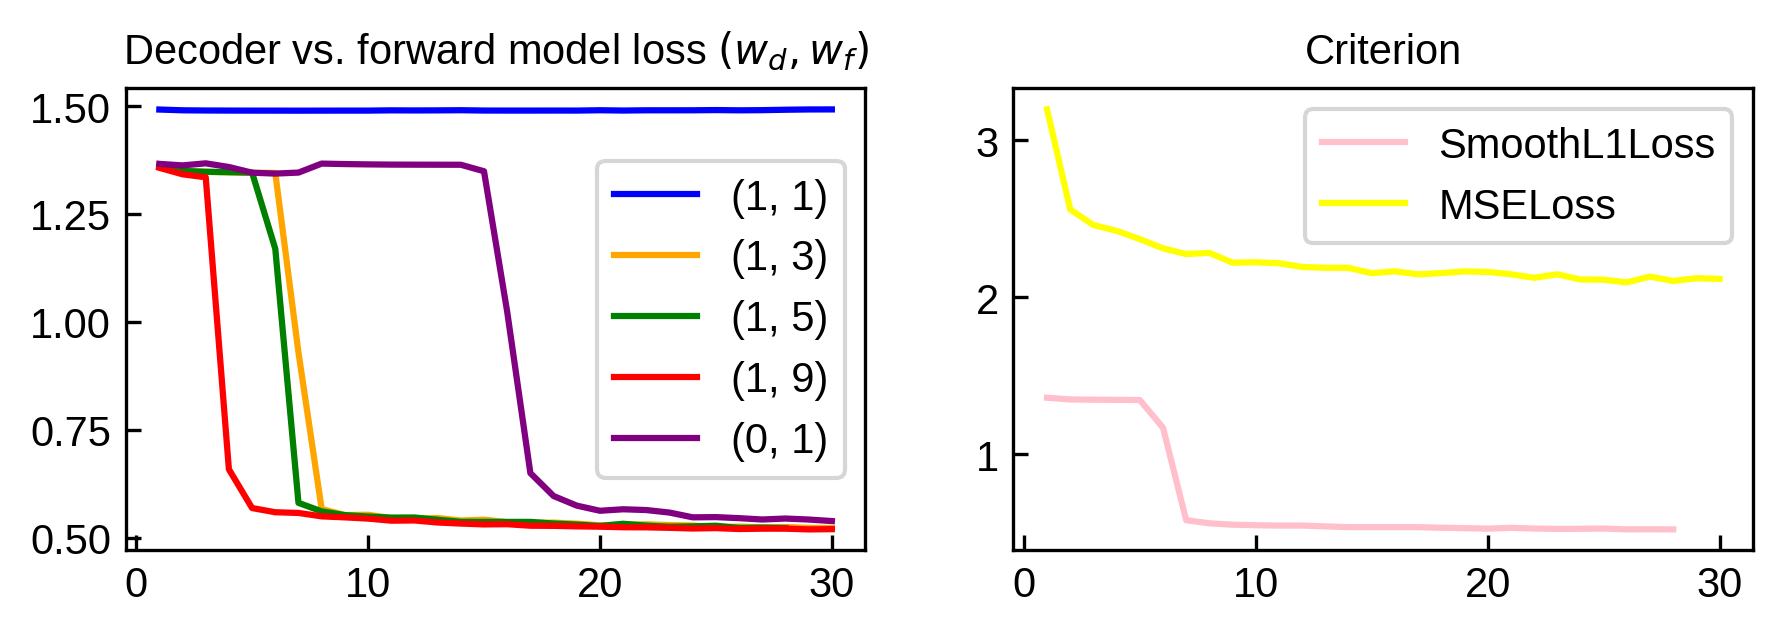

In [11]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 'truetype'

f, ax = plt.subplots(figsize=(7, 2), ncols=2)
ax[0].plot(np.linspace(1, 30, 30), dec1sim1, color='blue', label='(1, 1)')
ax[0].plot(np.linspace(1, 30, 30), dec1sim3, color='orange', label='(1, 3)')
ax[0].plot(np.linspace(1, 28, 28), dec1sim5, color='green', label='(1, 5)')
ax[0].plot(np.linspace(1, 30, 30), dec1sim9, color='red', label='(1, 9)')
ax[0].plot(np.linspace(1, 30, 30), dec0sim1, color='purple', label='(0, 1)')
ax[0].tick_params(direction='in')
ax[0].set_title(r'Decoder vs. forward model loss $(w_d, w_f)$')
ax[0].legend()

ax[1].plot(np.linspace(1, 28, 28), smoothl1, color='pink', label='SmoothL1Loss')
ax[1].plot(np.linspace(1, 30, 30), l2, color='yellow', label='MSELoss')
ax[1].tick_params(direction='in')
ax[1].set_title('Criterion')
ax[1].legend()

f.savefig('figs8cd.svg', dpi=300, bbox_inches='tight', transparent=True)